In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/l3")

Análise exploratória para verificar os dados e possíveis inconsistências

In [3]:
df = pd.read_excel('sample.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
pd.DataFrame({'na':df.isna().sum(), 'tipo':df.dtypes, 'valores unicos':df.nunique()})

,na,tipo,valores unicos
Row ID,0,int64,9994
Order ID,0,object,5009
Order Date,0,datetime64[ns],1237
Ship Date,0,datetime64[ns],1334
Ship Mode,0,object,4
Customer ID,0,object,793
Customer Name,0,object,793
Segment,0,object,3
Country,0,object,1
City,0,object,531


- Dados bem organizados, bem nomeados. Sem valores nulos e com tipos corretamente definidos.

In [6]:
df[['Customer ID', 'Customer Name']]

,Customer ID,Customer Name
0,CG-12520,Claire Gute
1,CG-12520,Claire Gute
2,DV-13045,Darrin Van Huff
3,SO-20335,Sean O'Donnell
4,SO-20335,Sean O'Donnell
...,...,...
9989,TB-21400,Tom Boeckenhauer
9990,DB-13060,Dave Brooks
9991,DB-13060,Dave Brooks
9992,DB-13060,Dave Brooks


In [7]:
# Observando um exemplo aleatório
df[ df['Customer ID'] == "CC-12220" ]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1263,1264,CA-2016-155992,2016-10-01,2016-10-02,First Class,CC-12220,Chris Cortes,Consumer,United States,La Porte,Indiana,46350,Central,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,69.900,2,0.0,18.8730
1264,1265,CA-2016-155992,2016-10-01,2016-10-02,First Class,CC-12220,Chris Cortes,Consumer,United States,La Porte,Indiana,46350,Central,FUR-FU-10003724,Furniture,Furnishings,Westinghouse Clip-On Gooseneck Lamps,41.850,5,0.0,10.8810
2335,2336,CA-2017-152695,2017-12-10,2017-12-10,Same Day,CC-12220,Chris Cortes,Consumer,United States,Fairfield,Connecticut,6824,East,OFF-EN-10004030,Office Supplies,Envelopes,Convenience Packs of Business Envelopes,10.860,3,0.0,5.1042
2336,2337,CA-2017-152695,2017-12-10,2017-12-10,Same Day,CC-12220,Chris Cortes,Consumer,United States,Fairfield,Connecticut,6824,East,OFF-AP-10000026,Office Supplies,Appliances,Tripp Lite Isotel 6 Outlet Surge Protector wit...,426.790,7,0.0,123.7691
3254,3255,CA-2016-155474,2016-07-08,2016-07-14,Standard Class,CC-12220,Chris Cortes,Consumer,United States,Seattle,Washington,98105,West,TEC-PH-10001580,Technology,Phones,Logitech Mobile Speakerphone P710e - speaker p...,107.984,1,0.2,9.4486
3255,3256,CA-2016-155474,2016-07-08,2016-07-14,Standard Class,CC-12220,Chris Cortes,Consumer,United States,Seattle,Washington,98105,West,OFF-BI-10004209,Office Supplies,Binders,"Fellowes Twister Kit, Gray/Clear, 3/pkg",19.296,3,0.2,6.0300
4002,4003,CA-2016-145730,2016-03-03,2016-03-08,Standard Class,CC-12220,Chris Cortes,Consumer,United States,San Antonio,Texas,78207,Central,FUR-TA-10004915,Furniture,Tables,"Office Impressions End Table, 20-1/2""H x 24""W ...",637.896,3,0.3,-127.5792
4003,4004,CA-2016-145730,2016-03-03,2016-03-08,Standard Class,CC-12220,Chris Cortes,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10001016,Technology,Machines,Canon PC170 Desktop Personal Copier,287.910,3,0.4,33.5895
4004,4005,CA-2016-145730,2016-03-03,2016-03-08,Standard Class,CC-12220,Chris Cortes,Consumer,United States,San Antonio,Texas,78207,Central,OFF-EN-10000483,Office Supplies,Envelopes,"White Envelopes, White Envelopes with Clear Po...",36.600,3,0.2,11.8950
5384,5385,CA-2017-161410,2017-06-26,2017-07-03,Standard Class,CC-12220,Chris Cortes,Consumer,United States,Philadelphia,Pennsylvania,19143,East,TEC-PH-10001760,Technology,Phones,Bose SoundLink Bluetooth Speaker,358.200,3,0.4,41.7900


- Se a compra não é registrada por meio de cadastro do usuário, o único dado pessoal que temos vinculado ao ID é o nome, isso é perigoso. Em outras palavras, se o ID é construído a partir das primeiras letras do nome do comprador, teríamos diversas IDs iguais para pessoas diferentes.
- Chris Cortes é um consumidor (isso significaria um indivíduo?), porém diversas compras feitas em seu nome e ID são de cidades (e estados!) variadas. Será o mesmo cliente ou não?

In [8]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

- Pedidos feitos entre as datas de janeiro de 2014 e dezembro de 2017
- Foram 5009 pedidos nesse período
- Importante acompanhar as datas dos novos pedidos, conferir se data de registro está próximo à data de compra e entrega
- Acompanhar também se data de entrega > data de compra
- E acompanhar se as datas estão crescentes (se agora aparecer um dado do ano passado, possivelmente o registro está incorreto)

4.049312853678254


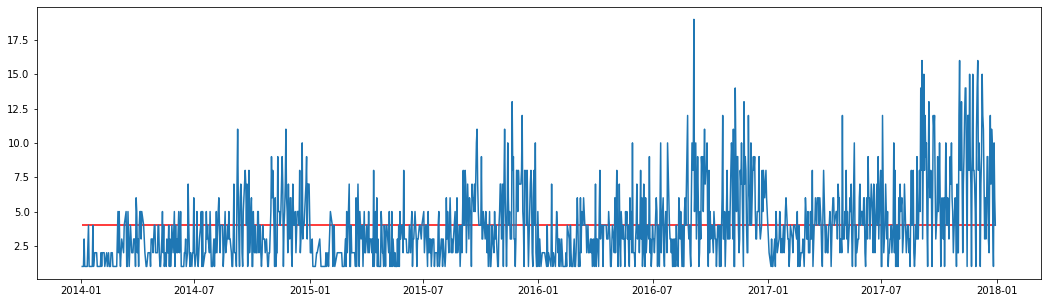

In [ ]:
df['DataPedido'] = df['Order Date'].dt.date

plt.figure(figsize=(18,5))
teste = df.groupby('DataPedido')['Order ID'].nunique()
plt.plot(teste.index, teste.values)
plt.hlines(teste.values.mean(), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='red');

print(teste.values.mean())

8.047696038803556


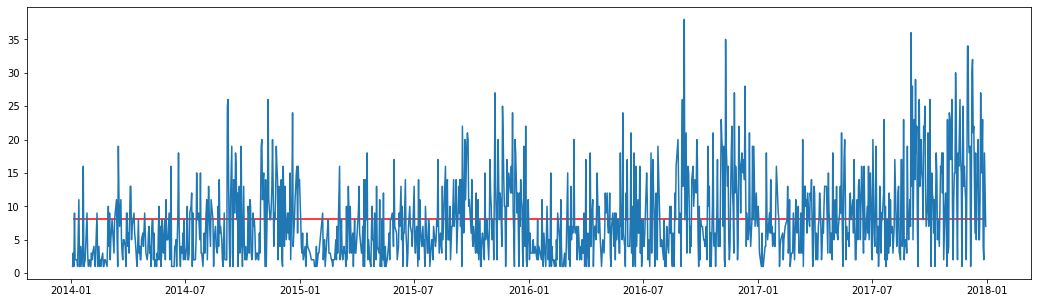

In [ ]:
plt.figure(figsize=(18,5))
teste = df.groupby('DataPedido')['Product ID'].nunique()
plt.plot(teste.index, teste.values)
plt.hlines(teste.values.mean(), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='red');

print(teste.values.mean())

30.616814874696846


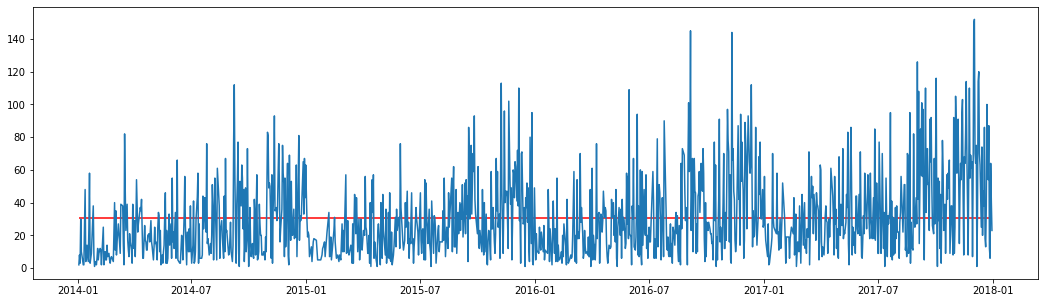

In [ ]:
plt.figure(figsize=(18,5))
teste = df.groupby('DataPedido')['Quantity'].sum()
plt.plot(teste.index, teste.values)
plt.hlines(teste.values.mean(), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='red');

print(teste.values.mean())

- Observamos um aumento (ao menos visivelmente) no número de pedidos ao longo do tempo
- Podemos observar picos no final do ano
- A média diária é de 4 pedidos; 8 produtos e de quase 31 unidades
- Acompanhar se as tendências de crescimento se mantém, assim como acompanhar se o padrão de sazonalidade se mantém

In [9]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [10]:
df['City'].nunique()

531

In [11]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

- Todos os pedidos são feitos nos EUA, em 49 Estados e 531 cidades distintos
- Não tem a região "Norte" nos cadastros: por que?
- Se eu tivesse mais tempo, conferiria se cidades estão cadastradas nos Estados corretos, assim como regiões. Se não, seria importante verificar como esses dados são coletados (seria legal a seleção do estado e a posterior seleção da cidade a partir desse estado).

In [12]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [13]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

- Não entendi a diferença entre Consumer e Home Office (cômodo escritório), iria pedir para que esse item fosse melhor detalhado.

In [14]:
df['Order ID']

0       CA-2016-152156
1       CA-2016-152156
2       CA-2016-138688
3       US-2015-108966
4       US-2015-108966
             ...      
9989    CA-2014-110422
9990    CA-2017-121258
9991    CA-2017-121258
9992    CA-2017-121258
9993    CA-2017-119914
Name: Order ID, Length: 9994, dtype: object

In [15]:
df['IDCodigoInicial'] = [ re.sub("-\d{1,4}-\d{1,6}", "", id) for id in df['Order ID'] ]
df['IDCodigoInicial'].unique()

array(['CA', 'US'], dtype=object)

In [16]:
df[df['IDCodigoInicial'] == 'CA']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,IDCodigoInicial
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,CA
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,CA
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,CA
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,CA
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,CA
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,CA
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,CA
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,CA


- O "Order ID" deveria ser melhor detalhado para entender o que significa CA (não é Canadá, nem Estado da Califórnia) e US (USA, mesmo?)



In [17]:
lista =[]
lista_ano = [ re.findall("-(\d{1,4})-", ano) for ano in df['Order ID'] ]

for valor in lista_ano:
    lista.extend(valor)

lista = list(map(int, lista))

df['IDCodigoData'] = lista
df['IDCodigoData'].unique()

array([2016, 2015, 2014, 2017])

In [18]:
df [ df['IDCodigoData'] != df['Order Date'].dt.year ]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,IDCodigoInicial,IDCodigoData
1152,1153,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2,0.0,1.6380,CA,2017
1153,1154,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7,0.2,53.9217,CA,2017
2821,2822,CA-2017-100202,2016-12-31,2017-01-05,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,California,92804,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3,0.2,22.6782,CA,2017
4612,4613,US-2017-165953,2016-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,3,0.2,3.5712,US,2017
4613,4614,US-2017-165953,2016-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480,5,0.2,8.2180,US,2017
5738,5739,CA-2017-156139,2016-12-31,2017-01-06,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,3,0.2,13.4316,CA,2017
6341,6342,US-2017-105830,2016-12-31,2017-01-02,First Class,DB-13660,Duane Benoit,Consumer,United States,Lancaster,Ohio,43130,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,156.512,4,0.2,-35.2152,US,2017


In [19]:
df [ df['IDCodigoData'] != df['Ship Date'].dt.year ]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,IDCodigoInicial,IDCodigoData
270,271,CA-2017-163979,2017-12-28,2018-01-02,Second Class,KH-16690,Kristen Hastings,Corporate,United States,San Francisco,California,94110,West,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840,4,0.0,210.4936,CA,2017
305,306,CA-2014-130960,2014-12-30,2015-01-04,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Taylor,Michigan,48180,Central,OFF-AR-10003651,Office Supplies,Art,Newell 350,9.840,3,0.0,2.8536,CA,2014
525,526,CA-2015-158792,2015-12-26,2016-01-02,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,Lawrence,Massachusetts,1841,East,OFF-FA-10002815,Office Supplies,Fasteners,Staples,22.200,5,0.0,10.4340,CA,2015
570,571,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,OFF-LA-10001297,Office Supplies,Labels,Avery 473,72.450,7,0.0,34.7760,CA,2017
571,572,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,OFF-FA-10000585,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,4,0.0,6.4216,CA,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,8969,CA-2014-166730,2014-12-30,2015-01-01,First Class,DD-13570,Dorothy Dickinson,Consumer,United States,Memphis,Tennessee,38109,South,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,39.128,1,0.2,-8.8038,CA,2014
9282,9283,CA-2016-160486,2016-12-30,2017-01-04,Standard Class,EH-14185,Evan Henry,Consumer,United States,West Palm Beach,Florida,33407,South,OFF-PA-10002421,Office Supplies,Paper,Embossed Ink Jet Note Cards,72.224,4,0.2,25.2784,CA,2016
9875,9876,CA-2015-130855,2015-12-29,2016-01-05,Standard Class,RF-19840,Roy Französisch,Consumer,United States,New York City,New York,10035,East,OFF-SU-10003936,Office Supplies,Supplies,Acme Serrated Blade Letter Opener,6.360,2,0.0,0.0636,CA,2015
9942,9943,CA-2014-143371,2014-12-28,2015-01-03,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Anaheim,California,92804,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9,0.0,29.9646,CA,2014


- Ano do Order ID não relaciona 100% nem com a data de pedido nem com a de shipping. É necessário entender melhor como essa ID é construída e, se for o caso, corrigida.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


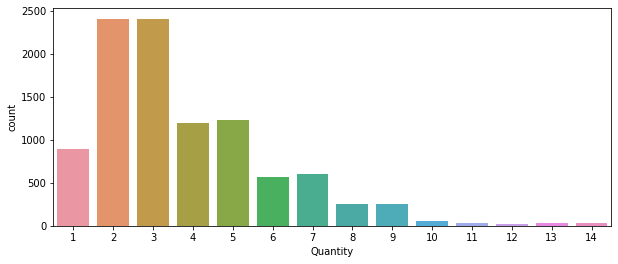

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(df['Quantity']);

- Acompanhar as quantidades: se aparecerem diversas quantidades acima de 14 unidades, o ideal seria verificar se está ocorrendo erro na coleta

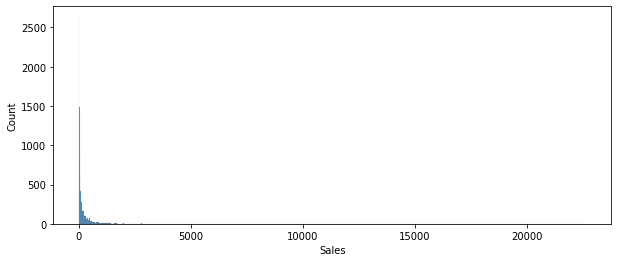

In [21]:
plt.figure(figsize=(10,4))
sns.histplot(df['Sales']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


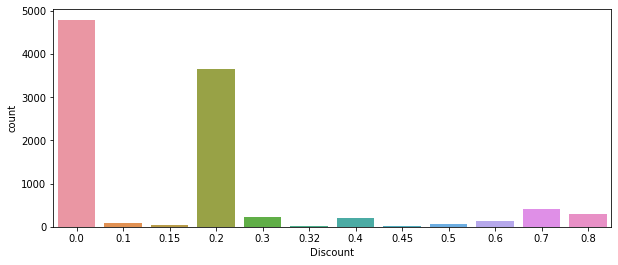

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(df['Discount']);

- Verificar descontos: tem que variar entre 0 e 1 (de preferência nunca chegando em 1)

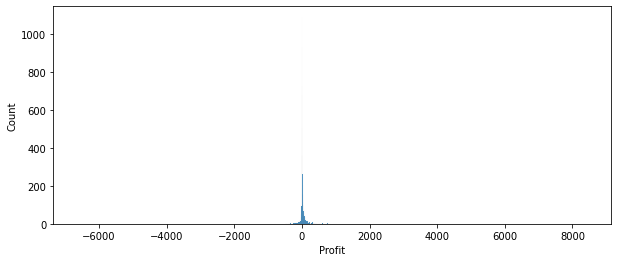

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(df['Profit']);

In [24]:
df['Profit'].min(), df['Profit'].max(), df['Profit'].mean()

(-6599.978000000001, 8399.975999999999, 28.6568963077848)

In [25]:
df['ValorTotal'] = df['Sales'] * df['Quantity']
df['ValorTotalcomDesconto'] = df['Sales'] * df['Quantity'] * (1 - df['Discount'])
df[['Sales','Quantity','ValorTotal','Discount','ValorTotalcomDesconto','Profit']]

,Sales,Quantity,ValorTotal,Discount,ValorTotalcomDesconto,Profit
0,261.9600,2,523.9200,0.00,523.920000,41.9136
1,731.9400,3,2195.8200,0.00,2195.820000,219.5820
2,14.6200,2,29.2400,0.00,29.240000,6.8714
3,957.5775,5,4787.8875,0.45,2633.338125,-383.0310
4,22.3680,2,44.7360,0.20,35.788800,2.5164
...,...,...,...,...,...,...
9989,25.2480,3,75.7440,0.20,60.595200,4.1028
9990,91.9600,2,183.9200,0.00,183.920000,15.6332
9991,258.5760,2,517.1520,0.20,413.721600,19.3932
9992,29.6000,4,118.4000,0.00,118.400000,13.3200


- Qual seria o padrão para o cálculo do lucro? O valores estão curiosos
- Por que existem tantos valores de lucro negativos?
- Na linha 3, por exemplo, houve uma venda no valor de $ 4787.8875 porém o lucro foi de -383.0310, por que?
- Os valores da taxa de entrega estão inclusos nesses valores?
- Por que os valores de 'Sales' tem quatro casas decimais? 

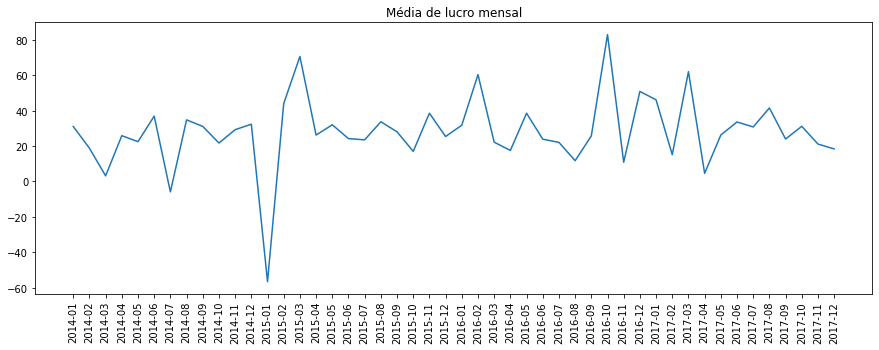

In [49]:
df['MesPedido'] = df['Order Date'].dt.strftime('%Y-%m')
teste = df.groupby('MesPedido')['Profit'].mean()

plt.figure(figsize=(15,5))
plt.plot(teste.index, teste.values)
plt.title("Média de lucro mensal")
plt.xticks(rotation=90);

In [50]:
teste = df.sort_values('Product ID')[['Product ID','Product Name']].drop_duplicates()
teste[ teste.duplicated('Product ID', keep=False) == True ]

,Product ID,Product Name
5079,FUR-BO-10002213,"Sauder Forest Hills Library, Woodland Oak Finish"
2115,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases
1881,FUR-CH-10001146,"Global Value Mid-Back Manager's Chair, Gray"
7591,FUR-CH-10001146,"Global Task Chair, Black"
7133,FUR-FU-10001473,DAX Wood Document Frame
...,...,...
1805,TEC-PH-10002200,Samsung Galaxy Note 2
9926,TEC-PH-10002310,Panasonic KX T7731-B Digital phone
7319,TEC-PH-10002310,Plantronics Calisto P620-M USB Wireless Speake...
8996,TEC-PH-10004531,OtterBox Commuter Series Case - iPhone 5 & 5s


- **IDs de produtos repetidos para produtos diferentes!!!**